<a href="https://colab.research.google.com/github/merttezcan/ML-Homeworks/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

num_data: 100
theta_0: [0.99857184]
theta_1,2,...: [[2.27540015 2.0907291 ]]
accuracy_rate (training): 0.89
X.shape: (100, 3)
theta.shape: (3,)
iter# 0 -- cost: 0.5600942278569597  - acc: 0.9
iter# 1 -- cost: 0.481689172493561  - acc: 0.9
iter# 2 -- cost: 0.43181866029759375  - acc: 0.9
iter# 3 -- cost: 0.39757793105336925  - acc: 0.9
iter# 4 -- cost: 0.3726037144907586  - acc: 0.9
iter# 5 -- cost: 0.35353229286898  - acc: 0.9
iter# 6 -- cost: 0.3384472878131776  - acc: 0.9
iter# 7 -- cost: 0.3261833548294372  - acc: 0.9
iter# 8 -- cost: 0.3159924135122859  - acc: 0.9
iter# 9 -- cost: 0.3073722761886892  - acc: 0.9
iter# 10 -- cost: 0.29997305669764535  - acc: 0.9
iter# 11 -- cost: 0.2935432539505804  - acc: 0.9
iter# 12 -- cost: 0.287897235472283  - acc: 0.9
iter# 13 -- cost: 0.2828948393709224  - acc: 0.9
iter# 14 -- cost: 0.27842813523948756  - acc: 0.9
iter# 15 -- cost: 0.27441257302713806  - acc: 0.9
iter# 16 -- cost: 0.2707809097790958  - acc: 0.9
iter# 17 -- cost: 0.267478945754

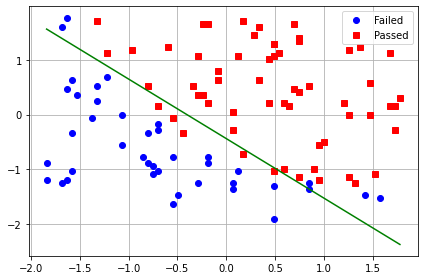

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


def load_data(data_file):

  data = np.genfromtxt(data_file, delimiter= ',', skip_header = True)
  num_data = len(data)

  print('num_data:', num_data)

  X = data[:, :-1]
  y = data[:, -1]

  X = StandardScaler().fit_transform(X)

 

  return X, y, num_data


def visualize_results(X, y, theta):

  failed_std_inx = np.where( y == 0)[0]
  passed_std_inx = np.where( y == 1)[0]

  print('# failed students:', len(failed_std_inx))
  print('# passed students:', len(passed_std_inx))

  failed_std_data = X[ failed_std_inx, 1: ]
  passed_std_data = X[ passed_std_inx, 1: ]

  plt.plot( failed_std_data[:,0], failed_std_data[:,1], 'bo', label= 'Failed' )
  plt.plot( passed_std_data[:,0], passed_std_data[:,1], 'rs', label= 'Passed' )

  x1 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), num = len(X))

  ## x2 = -(theta0 + theta1 * x1) / theta2
  x2 = -(theta[0] + theta[1] * x1) / theta[2]

  plt.plot(x1, x2, '-g')

  plt.grid()
  plt.tight_layout()
  plt.legend()
  plt.show()

def sigmoid(z):

  return 1 / ( 1 + np.exp(-z))

def cost_logloss(h_theta, y, num_data):

  return (1 / num_data) * sum((-y * np.log(h_theta)) - ((1-y) * np.log(1-h_theta)))

def accuracy(h_theta, y, num_data):

  h_theta_class = (h_theta >= 0.5).astype(int)
  num_correct = np.sum(h_theta_class == y)
  accuracy_rate = num_correct / num_data

  return accuracy_rate

def gradient_descent(X, y, num_data, alpha = 1, num_iter = 50):

  theta = np.zeros( len(X[0]) )

  print('X.shape:', X.shape)
  print('theta.shape:', theta.shape)

  ## my prediction
  h_theta = sigmoid( np.dot( X, theta ) )

  for i in range(num_iter):

    ## summation is already done in matrix multiplication
    theta = theta - alpha * (1/num_data) * np.dot( X.T, (h_theta - y))

    h_theta = sigmoid( np.dot( X, theta ) )

    cost = cost_logloss(h_theta, y, num_data)

    accuracy_rate = accuracy(h_theta, y, num_data)

    print('iter#', i, '-- cost:', cost, ' - acc:', accuracy_rate)

  print('predicted theta: ', theta)
  visualize_results(X, y, theta)

def run(data_file):
  X, y, num_data = load_data(data_file)

  scikit_logreg(X, y)

  ## adding 1 as the column 0 of X
  ## no need to calculate theta_0 separately
  X = np.insert(X, 0, 1, axis=1)

  gradient_descent(X, y, num_data)



def scikit_logreg(X, y):

  clf = LogisticRegression().fit(X, y)
  print('theta_0:', clf.intercept_)
  print('theta_1,2,...:', clf.coef_)

  accuracy_rate = clf.score(X, y)
  print('accuracy_rate (training):', accuracy_rate)


if __name__ == '__main__':
  data_file = 'sinav2-100-yuvarlak.csv'

  run(data_file)